# Exploring conformational space of selected macrocycles - "M7", Part 2


In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [38]:
import glob
import py3Dmol

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline 

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import rdMolAlign
from rdkit.Chem.Draw import IPythonConsole
from rdkit import rdBase
print(rdBase.rdkitVersion)
import os,time
print( time.asctime())

2016.09.4
Tue May 23 12:42:36 2017


In [39]:
# Functions used in this notebook:
def grep_energies_from_csvfile(fcsv):
    energies = {}
    with open(fcsv,'r') as f:
        lines = f.readlines()
        for line in lines:
            words = line.split()
            name = words[0].rsplit("_", 5)[0]
            energies[name] = float(words[1])
    return energies

def find_duplicates(rms_sorted, energy, rms_thresh, print_msg):
    i = 0
    to_be_deleted = []
    while i < len(rms_sorted):
        j = i + 1
        while j < len(rms_sorted):
            if rms_sorted[i][0] in to_be_deleted:
                i = i + 1
                j = j + 1
            elif rms_sorted[j][0] in to_be_deleted:
                j = j + 1
            else:
                rms1 = rms_sorted[i][1]
                rms2 = rms_sorted[j][1]
                if (rms2 - rms1) < rms_thresh:
                    if energy[rms_sorted[i][0]] < energy[rms_sorted[j][0]]:
                        to_be_deleted.append(rms_sorted[j][0])
                    else:
                        to_be_deleted.append(rms_sorted[i][0])
                else:
                    break
        i = i + 1
    if to_be_deleted and print_msg:
        print("Conformers which will be deleted:")    
        print(to_be_deleted)
    return to_be_deleted

def get_moldict_from_inplist(inplist):
    moldict = {}
    for i, inp in enumerate(inplist):
        mol = Chem.MolFromMolFile(inp)
        name = os.path.basename(os.path.splitext(inp)[0]).rsplit("_", 5)[0]
        model = "_".join(os.path.basename(os.path.splitext(inp)[0]).rsplit("_", 2)[1:])
        moldict[name] = mol
    return moldict

def check_freq(method, freq_inp_list):
    negative_freq_dict = {}
    for inp in freq_inp_list:
        count = 0
        with open(inp, "r") as f:
            lines = f.readlines()
            for line in lines:
                freq = line.split().strip()[1]
                print(freq)
                if float(freq) < 0.0:
                    count += 1
            if count > 0:
                negative_freq_list[os.path.basename(os.path.splitext(inp)[0]).rsplit("_", 5)[0]] = count
    if negative_freq_dict:
        return negative_freq_dict
    else:
        print("{}: all harmonic frequencies are positive".format(method))


def align_and_show(moldict):
    
    for key, mol in moldict.items():    
        core_mol = mol.GetSubstructMatch(Chem.MolFromSmiles(core_smiles))
        AllChem.AlignMol(mol,m1_crystal,atomMap=list(zip(core_mol,core_m1)))
    
    p = py3Dmol.view(width=400,height=400)
    for key, mol in moldict.items(): 
        mb = Chem.MolToMolBlock(mol)
        p.addModel(mb,'sdf')
    p.setStyle({'stick':{'radius':'0.15'}})
    p.setBackgroundColor('0xeeeeee')
    p.zoomTo()
    return p 

In [40]:
# decide what is the "core" - a part of molecule, which we wish to be most aligned (rmsd-wise) among all the structures

smiles = 'N1C(=O)c2nc(C(=O)NCCCNC(=O)c3nc(C(=O)NCCC1)ccc3)ccc2'
core_smiles = 'C(=O)c1nc(C=O)ccc1'

m7 = Chem.AddHs(Chem.MolFromSmiles(smiles))
core_m7 = m7.GetSubstructMatch(Chem.MolFromSmiles(core_smiles))

templ_m7 = Chem.SDMolSupplier('/home/gosia/work/work_on_gitlab/icho/calcs/m7/balloon/m7_crystal.sdf')
m7_crystal = templ_m7[0]

## Geometry optimization in Gaussian 09 software

### Computational setup and workflow

### Results

#### Comparison of DFT results with and without dispesion corrections

In [41]:
inps_gaussian_pbe_631gd = glob.glob('/home/gosia/work/work_on_gitlab/icho/calcs/m7/gaussian_results/optimized_geometries_frequencies_from_outputs/*pbe_631gd.sdf')
mol_gaussian_pbe_631gd = get_moldict_from_inplist(inps_gaussian_pbe_631gd)

inps_gaussian_b97d_631gd = glob.glob('/home/gosia/work/work_on_gitlab/icho/calcs/m7/gaussian_results/optimized_geometries_frequencies_from_outputs/*b97d_631gd.sdf')
mol_gaussian_b97d_631gd = get_moldict_from_inplist(inps_gaussian_b97d_631gd)

#p = align_and_show(mol_m1_gaussian_pbe_631gd) 
#p.show()

In [42]:
f_pbe_631gd = "/home/gosia/work/work_on_gitlab/icho/calcs/m7/gaussian_results/optimized_geometries_frequencies_from_outputs/energy_pbe_631gd.csv"
energy_pbe_631gd = grep_energies_from_csvfile(f_pbe_631gd)

f_b97d_631gd = "/home/gosia/work/work_on_gitlab/icho/calcs/m7/gaussian_results/optimized_geometries_frequencies_from_outputs/energy_b97d_631gd.csv"
energy_b97d_631gd = grep_energies_from_csvfile(f_b97d_631gd)

rms_pbe_631gd = {}
rms_b97d_631gd = {}

for key, mol in mol_gaussian_pbe_631gd.items():
    rms_pbe_631gd[key] = AllChem.GetBestRMS(Chem.RemoveHs(mol),Chem.RemoveHs(m7_crystal))
for key, mol in mol_gaussian_b97d_631gd.items():
    rms_b97d_631gd[key] = AllChem.GetBestRMS(Chem.RemoveHs(mol),Chem.RemoveHs(m7_crystal))   

In [43]:
#Having a set of DFT-optimized conformers, 
# we will analyze the root-mean-square distance between them (RMSD) and their energy in order to remove duplicates.

rms_thresh = 0.05
rms_sorted_pbe_631gd = sorted(rms_pbe_631gd.items(), key=lambda x: x[1])
rms_sorted_b97d_631gd = sorted(rms_b97d_631gd.items(), key=lambda x: x[1])

# now compare RMS of each pair, if the structures are too similar then delete the one with the higher energy
to_be_deleted_pbe_631gd = find_duplicates(rms_sorted_pbe_631gd, energy_pbe_631gd, rms_thresh, False)
to_be_deleted_b97d_631gd = find_duplicates(rms_sorted_b97d_631gd, energy_b97d_631gd, rms_thresh, False)

for mol in to_be_deleted_pbe_631gd:
    del mol_gaussian_pbe_631gd[mol]
    del energy_pbe_631gd[mol]
    del rms_pbe_631gd[mol]
    
for mol in to_be_deleted_b97d_631gd:
    del mol_gaussian_b97d_631gd[mol]
    del energy_b97d_631gd[mol]
    del rms_b97d_631gd[mol]

# print the names and energies of remaining conformers, sorted by energies:
print("Selected conformers sorted by energies [a.u.], pbe_631gd: ")
energy_pbe_631gd_sorted = sorted(energy_pbe_631gd.items(), key=lambda x: x[1])
for i, p in enumerate(energy_pbe_631gd_sorted):
    print("{0:<5} {1:20}  {2:20} ".format(i+1, p[0], p[1]))

print("\n")
print("Selected conformers sorted by energies [a.u.], b97d_631gd: ")
energy_b97d_631gd_sorted = sorted(energy_b97d_631gd.items(), key=lambda x: x[1])
for i, p in enumerate(energy_b97d_631gd_sorted):
    print("{0:<5} {1:20}  {2:20} ".format(i+1, p[0], p[1]))

Selected conformers sorted by energies [a.u.], pbe_631gd: 
1     m7_b_sdf_12                  -1403.4504497 
2     m7_b_sdf_2                  -1403.45043974 
3     m7_b_smi_0                  -1403.44785662 
4     m7_b_sdf_20                 -1403.44726578 
5     m7_b_sdf_6                  -1403.44633813 
6     m7_rdkit_sdf_70             -1403.42443916 
7     m7_rdkit_smi_24             -1403.41427098 
8     m7_rdkit_smi_81             -1403.40654876 
9     m7_rdkit_smi_94             -1403.40637064 
10    m7_rdkit_smi_43             -1403.39685642 


Selected conformers sorted by energies [a.u.], b97d_631gd: 
1     m7_b_sdf_20                 -1403.91907332 
2     m7_b_sdf_0                  -1403.91784506 
3     m7_b_sdf_2                  -1403.91496755 
4     m7_b_sdf_3                  -1403.91496075 
5     m7_rdkit_sdf_70             -1403.88905447 
6     m7_rdkit_smi_24             -1403.88644446 
7     m7_rdkit_smi_81             -1403.87886218 
8     m7_rdkit_smi_43        

Now we will check the frequency calculations:

In [44]:
f_freq_gaussian_pbe_631gd = glob.glob('/home/gosia/work/work_on_gitlab/icho/calcs/m7/gaussian_results/optimized_geometries_frequencies_from_outputs/freq*pbe_631gd.csv')
freq_gaussian_pbe_631gd = check_freq("pbe_631gd", f_freq_gaussian_pbe_631gd)

pbe_631gd: all harmonic frequencies are positive


In [45]:
f_freq_gaussian_b97d_631gd = glob.glob('/home/gosia/work/work_on_gitlab/icho/calcs/m7/gaussian_results/optimized_geometries_frequencies_from_outputs/freq*pbe_631gd.csv')
freq_gaussian_b97d_631gd = check_freq("b97d_631gd", f_freq_gaussian_b97d_631gd)

b97d_631gd: all harmonic frequencies are positive


The aligned structures of selected conformers obtained with PBE and B97D and 6-31G(d) basis set are presented below:

In [46]:
%%html
<table>
  <tr>
    <td id="pbe_631gd" ></td>
    <td id="b97d_631gd"  ></td>
  <tr>
    <td> pbe_631gd </td>
    <td> b97d_631gd  </td>  
  </tr>
</table>

,
pbe_631gd,b97d_631gd


In [47]:
for key, mol in mol_gaussian_pbe_631gd.items():
    core_mol = mol.GetSubstructMatch(Chem.MolFromSmiles(core_smiles))
    AllChem.AlignMol(mol,m7_crystal,atomMap=list(zip(core_mol,core_m7)))
    
p1 = py3Dmol.view(width=400,height=400)
for key, mol in mol_gaussian_pbe_631gd.items():
    mb = Chem.MolToMolBlock(mol)
    p1.addModel(mb,'sdf')
p1.setStyle({'stick':{'radius':'0.15'}})
p1.setBackgroundColor('0xeeeeee')
p1.zoomTo()
p1.insert("pbe_631gd")

In [48]:
for key, mol in mol_gaussian_b97d_631gd.items():
    core_mol = mol.GetSubstructMatch(Chem.MolFromSmiles(core_smiles))
    AllChem.AlignMol(mol,m7_crystal,atomMap=list(zip(core_mol,core_m7))) 
    
p2 = py3Dmol.view(width=400,height=400)
for key, mol in mol_gaussian_b97d_631gd.items():
    mb = Chem.MolToMolBlock(mol)
    p2.addModel(mb,'sdf')
p2.setStyle({'stick':{'radius':'0.15'}})
p2.setBackgroundColor('0xeeeeee')
p2.zoomTo()
p2.insert("b97d_631gd")    

We will work with conformers optimized with B97D/6-31G(d) model.


In [49]:
# write selected conformers to file:
with open("/home/gosia/work/work_on_gitlab/icho/calcs/m7/gaussian_results/list_selected_conformers_b97d_631gd", "w") as f:
    for key, mol in mol_gaussian_b97d_631gd.items():
        f.write(key+"\n")

#### The evaluation of model deficiencies - MP2 calculations and basis set effects

#### Gibbs free energy corrections

Calculated for the selected conformers with **B97D/6-31G(d)** model - only for local minima.

In [50]:
final_results = "/home/gosia/work/work_on_gitlab/icho/calcs/m7/gaussian_results/FINAL_RESULTS_selected_conformers_thermochemistry_b97d_631gd.csv"
final_data    = pd.read_csv(final_results, 
                            skiprows=18, 
                            usecols=[0,5,6,7,8,9,10],
                            delimiter=r"\s+")
final_data

,#Mol,E1-E1(min)[kcal/mol],E2-E2(min)[kcal/mol],E3-E3(min)[kcal/mol],E4-E4(min)[kcal/mol],Boltzmann_weight,Mol_fraction
0,m7_b_sdf_20,0.000000,0.000000,0.000000,0.000000,1.000000,0.083343
1,m7_b_sdf_6,0.061496,0.123619,0.123619,-1.327182,1.000009,0.083343
2,m7_b_smi_0,0.815135,0.806350,0.806350,0.651982,0.999996,0.083342
3,m7_b_sdf_0,0.837725,0.846510,0.846510,0.534010,0.999996,0.083342
4,m7_rdkit_sdf_70,19.072520,19.202415,19.202415,18.099253,0.999879,0.083333
5,m7_rdkit_smi_24,20.544030,20.663257,20.663257,19.185472,0.999872,0.083332
6,m7_rdkit_smi_81,25.288628,25.392795,25.392795,24.044905,0.999840,0.083329
7,m7_rdkit_smi_94,26.262523,26.498467,26.498467,23.748720,0.999842,0.083329
8,m7_rdkit_smi_15,29.063097,29.415758,29.415758,27.086443,0.999820,0.083328
9,m7_rdkit_sdf_104,31.406845,31.612668,31.612668,30.395927,0.999798,0.083326


In [51]:
def plot_line(data, xmin, xmax):
    for i, v in enumerate(data):
        if i == 0:
            ax.hlines(v, xmin, xmax, linestyle='-', color='r', linewidth=1.5)
        else:
            ax.hlines(v, xmin, xmax, linestyle='-', linewidth=1)


def set_style():
    sns.set_context("paper")
    sns.set(font='serif')
    sns.set_style("white", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"]
    })

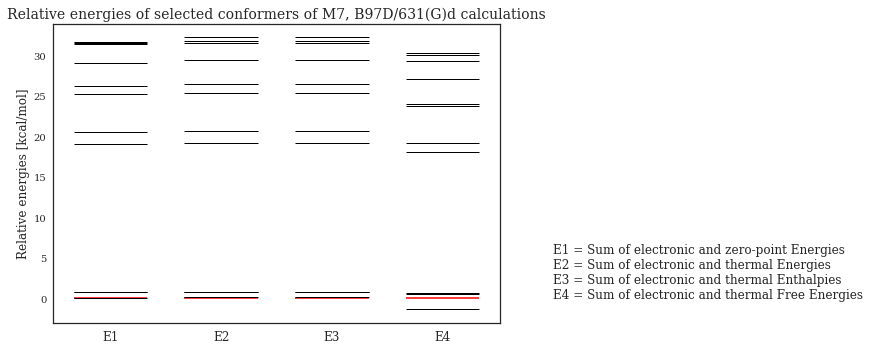

In [52]:
set_style()
fig, ax = plt.subplots()

ax.set_title("Relative energies of selected conformers of M7, B97D/631(G)d calculations", fontsize=14)
ax.set_ylabel("Relative energies [kcal/mol]", fontsize=12)
ax.set_xticks([0.0, 1.5, 3.0, 4.5])
ax.set_xticklabels(["E1", "E2", "E3", "E4"], fontsize=12)

plot_line(final_data["E1-E1(min)[kcal/mol]"], -0.5, 0.5)
plot_line(final_data["E2-E2(min)[kcal/mol]"],  1.0, 2.0)
plot_line(final_data["E3-E3(min)[kcal/mol]"],  2.5, 3.5)
plot_line(final_data["E4-E4(min)[kcal/mol]"],  4.0, 5.0)

ax.text(6, 0,
"E1 = Sum of electronic and zero-point Energies\n\
E2 = Sum of electronic and thermal Energies\n\
E3 = Sum of electronic and thermal Enthalpies\n\
E4 = Sum of electronic and thermal Free Energies")